importing Jupyter notebook from Heart_Disease.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca        

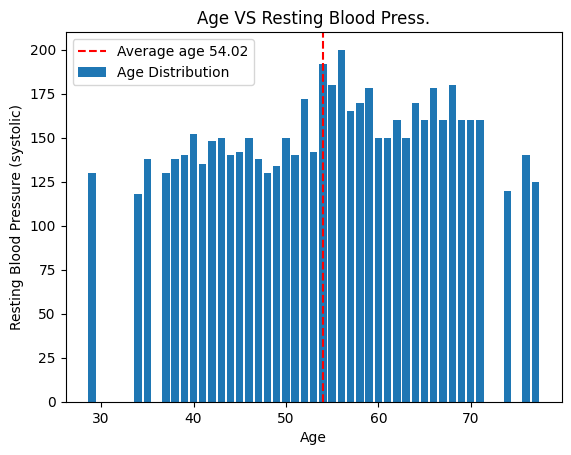

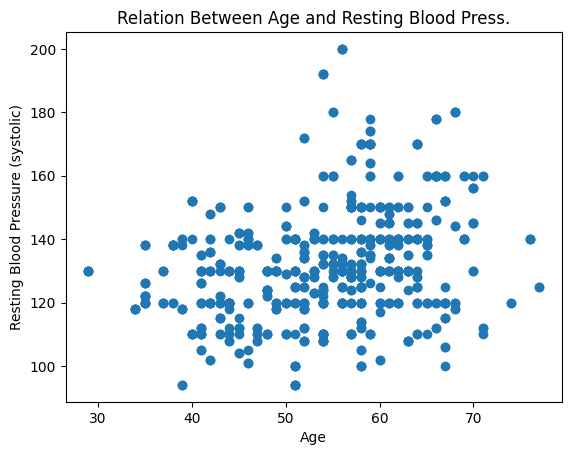

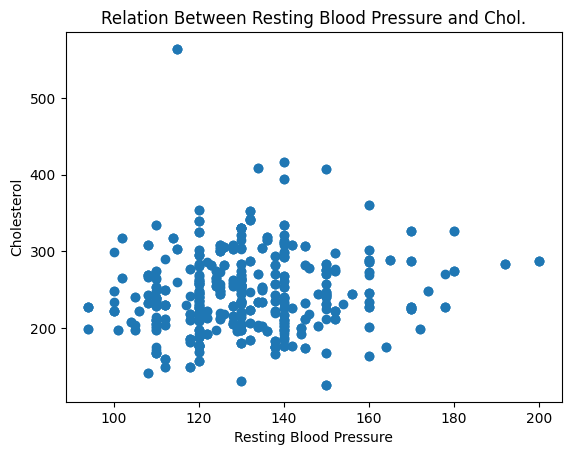

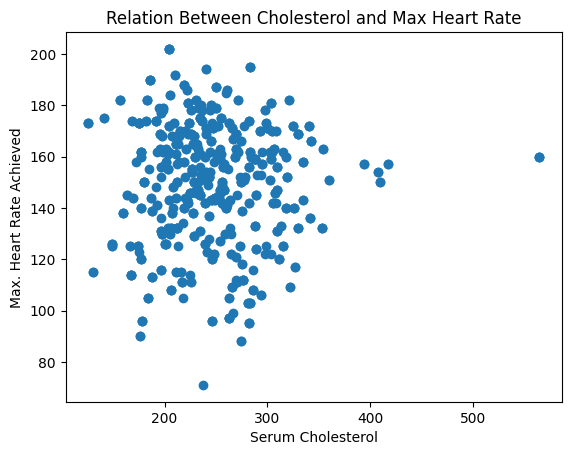

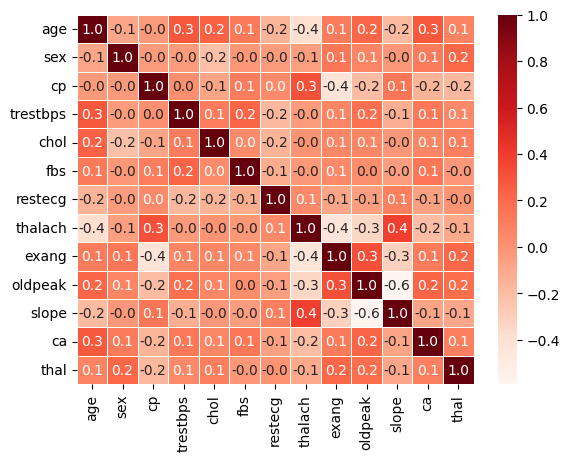

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
Model Training Score: 0.9373177842565598
Model Testing Score: 0.8377581120943953
Pipeline(steps=[('scaler', StandardScaler()),
                ('ffs',
                 SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=4),
                                           n_features_to_select=5)),
                ('knn', SVC(C=8.0, probability=True))])
-0.14286469903734264
Pipeline Training Score: 0.8892128279883382
Pipeliine Testing Score: 0.8672566371681416
['age', 'sex', 'oldpeak', 'ca', 'thal']
[[0.44945984 0.55054016]]
[1]


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [53]:
import import_ipynb 
from Heart_Disease import best_pipeline

In [52]:
import numpy as np
import re

In [78]:
class HeartDiseasePredictor(object):
    def __init__(self, firstname, lastname):
        self.__username = ""
        self.__firstname = firstname
        self.__lastname = lastname
        self.__password = ""
        self.__userData = {}

    def set_username(self, username):
        self.__username = username

    def set_password(self, password):
        flag = 0
        while True:
           if(len(password) < 8):
               flag = -1
               break
           elif not re.search("[a-z]", password):
               flag = -1
               break
           elif not re.search("[A-Z]", password):
               flag = -1
               break
           elif not re.search("[0-9]", password):
                flag = -1
                break
           elif not re.search("[_@$]", password):
                flag = -1
                break
           else:
               flag = 0
               print("Valid password")
               self.__password = password
               break
        if flag == -1:
            raise Exception("Invalid password entered")
        
    def set_database_object(self):
        self.__userData = {self.__username: [self.__firstname, self.__lastname, self.__password]}
            
    def get_user_data(self):
        return self.__userData

    def login(self, username, password):  
        if username in self.__userData:
           print("Logging in")
        else:
            raise Exception("User does not exist")
                
    def make_prediction(self, data=[]):
        print("Status for: {}".format(self.__username))
        print("Heart Disease Status: {}".format(best_pipeline.predict(data)))
        print("Heart Disease Probability {}".format(best_pipeline.predict_proba(data)))
    
    def create_account(self, username, password,
                      reconfirm_pass):  
        """
        Creating a new user
        params: username, password, reconfirmPass
        """
        if password != reconfirm_pass:
            raise ValueError("Passwords do not match")
        else:
            self.set_username(username)
            self.set_password(password)
            self.set_database_object()
                

In [69]:
userOne = HeartDiseasePredictor("John", "Steward")
userOne.create_account("StewardJohn", "n3wP@ssw0rd", "n3wP@ssw0rd")

Valid password


In [64]:
userOne.login("StewardJohn", "n3wP@ssw0rd")

Logging in


In [60]:
userOne.make_prediction([[75, 1, 0, 125, 212, 0, 1, 155, 0, 3.1, 2, 2, 3]])

Status for: StewardJohn
Heart Disease Status: [0]
Heart Disease Probability [[0.85257098 0.14742902]]


C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [70]:
userOne.get_user_data()

{'StewardJohn': ['John', 'Steward', 'n3wP@ssw0rd']}

In [ ]:
#UNIT TESTING SECTION

In [79]:
import unittest
import traceback
class HeartDiseaseTests(unittest.TestCase):
 
     def test_password_accuracy(self):
        """
        test password for required characters:
        [a-z] [A-Z] [0-9] [_@$]
        """
        password = HeartDiseasePredictor("Bruce", "Wayne")
        self.assertRaises(Exception, password.set_password, "mymes")

     def test_create_account_password_match(self):
        """
        Test the user's password matchup
        """
        createAccountSetup = HeartDiseasePredictor("Bruce", "Wayne")
        self.assertRaises(ValueError, createAccountSetup.create_account, "TestMan",
                         "aRkh@m2015", "aRkham2015")

     def test_user_login(self):
        """
        Test user login to see
        if user exists
        """
        userLogin = HeartDiseasePredictor("Bruce", "Wayne")
        self.assertRaises(Exception, userLogin.login, "TestMan",
                         "JasonTodd24", "s0m3P@ssword")


if __name__ == "__main__":
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
         

...
----------------------------------------------------------------------
Ran 3 tests in 0.013s

OK
